# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# Cell 1: imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# nicer plots in notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")

In [2]:
# Cell 2: load dataset
# In Coursera environment the file is provided as 'Online Retail.xlsx'
# If running locally, replace path or use the UCI URL (requires internet)
path = 'Online Retail.xlsx'
df = pd.read_excel(path)

# Quick peek
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Cell 3: basic info
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909,NaN,NaN,NaN,NaT,NaT,9.55225,218.081,-80995,1,3,10,80995
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909,NaN,NaN,NaN,NaT,NaT,4.61111,96.7599,-11062.1,1.25,2.08,4.13,38970
CustomerID,406829,NaN,NaN,NaN,NaT,NaT,15287.7,1713.6,12346,13953,15152,16791,18287
Country,541909,38,United Kingdom,495478,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cell 4: common cleaning steps (explainable and safe)
# 1) Remove rows with missing InvoiceNo or Description
# 2) Convert InvoiceDate to datetime
# 3) Remove negative or zero quantities and unit prices (likely cancellations/returns)
# 4) Drop rows with missing CustomerID if necessary (or keep for aggregate analyses)

df = df.copy()
df = df.dropna(subset=['InvoiceNo','Description'])  # essential fields
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# numeric cleaning
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# optionally: remove cancelled invoices (InvoiceNo starting with 'C' often indicates cancellation)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# create TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# check cleaned shape
df.shape


(530104, 9)

In [5]:
# Cell 5: useful features for retail analysis
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceMonthName'] = df['InvoiceDate'].dt.strftime('%b')
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour


In [6]:
# Cell 6: top-level numbers
total_revenue = df['TotalPrice'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()
total_items_sold = df['Quantity'].sum()

print(f"Total revenue: {total_revenue:,.2f}")
print(f"Total orders (unique invoices): {total_orders}")
print(f"Total customers: {total_customers}")
print(f"Total items sold: {total_items_sold}")


Total revenue: 10,666,684.54
Total orders (unique invoices): 19960
Total customers: 4338
Total items sold: 5588376


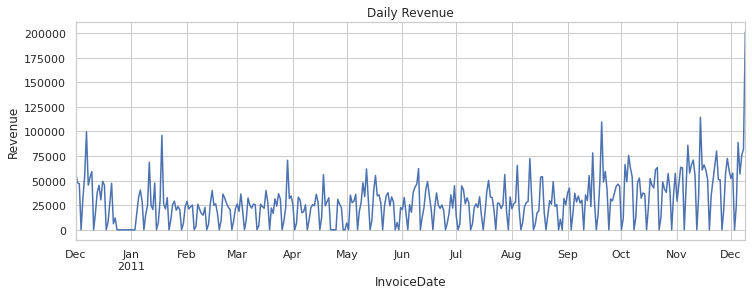

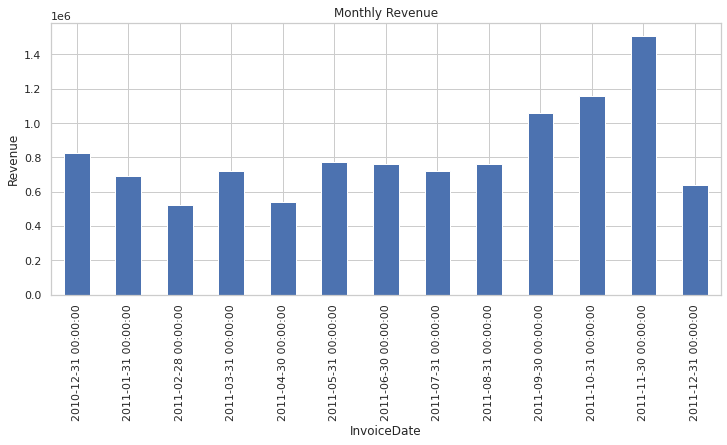

In [7]:
# Cell 7: daily revenue time series
daily = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum().fillna(0)
daily.plot(title='Daily Revenue', figsize=(12,4))
plt.ylabel('Revenue')
plt.show()

# Cell 8: monthly revenue (useful to identify busiest months)
monthly = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()
monthly.plot(kind='bar', title='Monthly Revenue', figsize=(12,5))
plt.ylabel('Revenue')
plt.show()


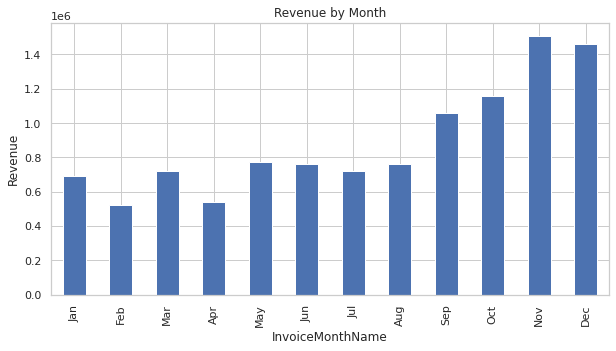

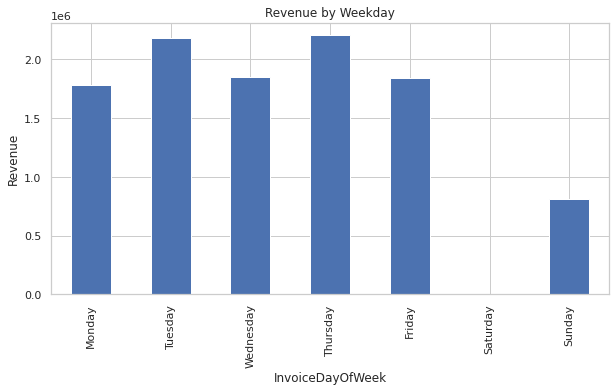

In [8]:
# Cell 9: busiest month and day of week by revenue and by quantity
rev_by_month = df.groupby('InvoiceMonthName')['TotalPrice'].sum().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
rev_by_month.plot(kind='bar', title='Revenue by Month')
plt.ylabel('Revenue')
plt.show()

rev_by_weekday = df.groupby('InvoiceDayOfWeek')['TotalPrice'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
rev_by_weekday.plot(kind='bar', title='Revenue by Weekday')
plt.ylabel('Revenue')
plt.show()


Top products by quantity (top 10):
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

Top products by revenue (top 10):
Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBI

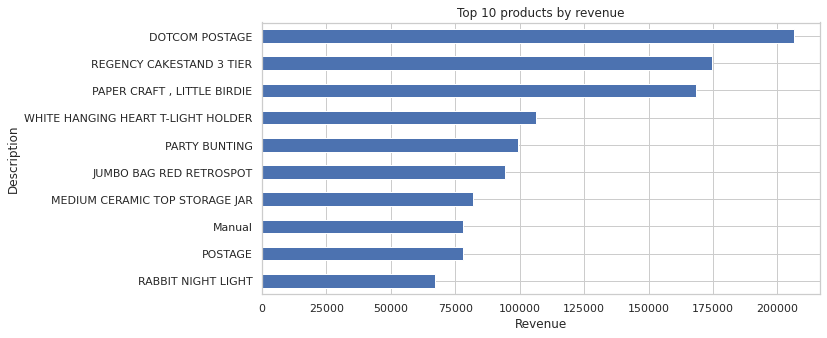

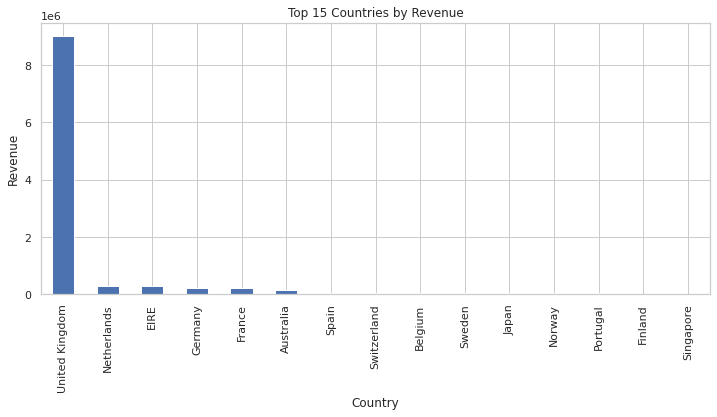

In [9]:
# Cell 10: top products by quantity and by revenue
top_by_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
top_by_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(20)

print("Top products by quantity (top 10):")
print(top_by_quantity.head(10))

print("\nTop products by revenue (top 10):")
print(top_by_revenue.head(10))

# visualize top 10 by revenue
top_by_revenue.head(10).plot(kind='barh', title='Top 10 products by revenue')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()
plt.show()

# countries
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales.head(15).plot(kind='bar', title='Top 15 Countries by Revenue', figsize=(12,5))
plt.ylabel('Revenue')
plt.show()


In [10]:
# Cell 11: quick RFM (Recency, Frequency, Monetary)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPrice':'Monetary'})

rfm.describe()
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [11]:
# Cell 12: detect outliers in unit price & total price using IQR
def detect_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return series[(series < lower) | (series > upper)]

unitprice_outliers = detect_iqr_outliers(df['UnitPrice'])
totalprice_outliers = detect_iqr_outliers(df['TotalPrice'])

print(f"UnitPrice outliers (count): {unitprice_outliers.shape[0]}")
print(f"TotalPrice outliers (count): {totalprice_outliers.shape[0]}")


UnitPrice outliers (count): 37999
TotalPrice outliers (count): 42651


In [12]:
# Cell 13: quick check for suspicious invoices (very large totals)
top_invoices = df.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending=False).head(20)
top_invoices


InvoiceNo
581483    168469.60
541431     77183.60
574941     52940.94
576365     50653.91
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
548203     21627.72
550461     21535.90
572035     20277.92
563076     19150.66
562439     18841.48
539750     18745.86
573585     16874.58
541220     16774.72
545475     16726.84
562955     16677.26
Name: TotalPrice, dtype: float64

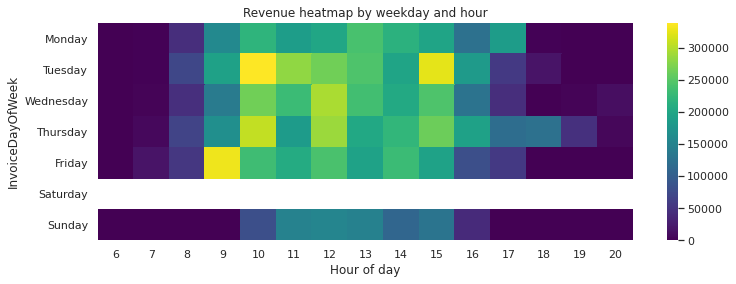

In [13]:
# Cell 14: heatmap of hour-of-day vs weekday revenue
hour_day = df.groupby(['InvoiceDayOfWeek','InvoiceHour'])['TotalPrice'].sum().unstack(fill_value=0)
# reorder weekdays
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hour_day = hour_day.reindex(order)
plt.figure(figsize=(12,4))
sns.heatmap(hour_day, cmap='viridis')
plt.title('Revenue heatmap by weekday and hour')
plt.xlabel('Hour of day')
plt.show()


In [14]:
top_by_revenue.head(100).to_csv('top_products_by_revenue.csv')
rfm.to_csv('rfm_customers.csv')


In [16]:
# Example: auto-generate insights from summary stats

# Find top month and weekday by revenue
top_month = rev_by_month.idxmax()
top_month_value = rev_by_month.max()

top_weekday = rev_by_weekday.idxmax()
top_weekday_value = rev_by_weekday.max()

top_country = country_sales.idxmax()
top_country_value = country_sales.max()

print("===== AUTOMATED INSIGHT SUMMARY =====")
print(f"• The highest revenue month was {top_month} with total sales of £{top_month_value:,.0f}.")
print(f"• The highest performing day of the week was {top_weekday} (£{top_weekday_value:,.0f}).")
print(f"• The country generating the most revenue was {top_country} (£{top_country_value:,.0f}).")

# Find top product
top_product = top_by_revenue.head(1)
print(f"• The top-selling product was '{top_product.index[0]}' with total revenue of £{top_product.iloc[0]:,.0f}.")

# Add a brief recommendation
print("\n===== RECOMMENDATIONS =====")
print("- Prioritize inventory and marketing for top months (especially around holidays).")
print("- Introduce weekday discounts to boost midweek sales.")
print("- Focus on high-value markets like", top_country, "for targeted marketing or improved logistics.")
print("- Consider bundling top products with slower-moving items to balance stock.")


===== AUTOMATED INSIGHT SUMMARY =====
• The highest revenue month was Nov with total sales of £1,509,496.
• The highest performing day of the week was Thursday (£2,203,161).
• The country generating the most revenue was United Kingdom (£9,025,222).
• The top-selling product was 'DOTCOM POSTAGE' with total revenue of £206,249.

===== RECOMMENDATIONS =====
- Prioritize inventory and marketing for top months (especially around holidays).
- Introduce weekday discounts to boost midweek sales.
- Focus on high-value markets like United Kingdom for targeted marketing or improved logistics.
- Consider bundling top products with slower-moving items to balance stock.


In [17]:
summary_text = f"""
📊 **Summary of Retail Performance**

- 🏆 *Top Month:* {top_month} — £{top_month_value:,.0f}
- 🕒 *Top Day:* {top_weekday} — £{top_weekday_value:,.0f}
- 🌍 *Top Country:* {top_country} — £{top_country_value:,.0f}
- 🎁 *Best Product:* {top_product.index[0]} (£{top_product.iloc[0]:,.0f})

💡 **Recommendations**
1. Increase marketing spend and stock before {top_month} to capture peak demand.
2. Run targeted weekday promotions (e.g., {top_weekday} sales).
3. Deepen relationships in {top_country} through localized campaigns.
4. Expand top product categories and optimize shipping for high-demand regions.
"""

from IPython.display import Markdown, display
display(Markdown(summary_text))



📊 **Summary of Retail Performance**

- 🏆 *Top Month:* Nov — £1,509,496
- 🕒 *Top Day:* Thursday — £2,203,161
- 🌍 *Top Country:* United Kingdom — £9,025,222
- 🎁 *Best Product:* DOTCOM POSTAGE (£206,249)

💡 **Recommendations**
1. Increase marketing spend and stock before Nov to capture peak demand.
2. Run targeted weekday promotions (e.g., Thursday sales).
3. Deepen relationships in United Kingdom through localized campaigns.
4. Expand top product categories and optimize shipping for high-demand regions.


In [18]:
print("==== Final Insights Summary ====")
print(f"Total Revenue: £{total_revenue:,.0f}")
print(f"Unique Customers: {total_customers}")
print(f"Busiest Month: {top_month}")
print(f"Top Product: {top_product.index[0]}")

print("\nBusiness Recommendations:")
print("1. Focus on increasing retention of top 20% customers.")
print("2. Review pricing strategy for underperforming months.")
print("3. Expand to markets similar to", top_country, "with strong sales potential.")


==== Final Insights Summary ====
Total Revenue: £10,666,685
Unique Customers: 4338
Busiest Month: Nov
Top Product: DOTCOM POSTAGE

Business Recommendations:
1. Focus on increasing retention of top 20% customers.
2. Review pricing strategy for underperforming months.
3. Expand to markets similar to United Kingdom with strong sales potential.
